In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [2]:
song_titles = []
song_artists = []

In [3]:
link = "https://www.billboard.com/charts/year-end/2022/pop-songs/"

response = requests.get(link)
#print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
for song in soup.find_all("div", class_="o-chart-results-list-row-container"):
        song_name = song.find_all("h3", class_="c-title")
        song_titles.append(song_name[0].text.strip())
        print(song_name[0].text.strip(), end=", ")
        song_artist = song.find_all("span", class_="c-label")
        song_artists.append(song_artist[1].text.strip())
        print(song_artist[1].text.strip())

As It Was, Harry Styles
Thats What I Want, Lil Nas X
Heat Waves, Glass Animals
Stay, The Kid LAROI & Justin Bieber
About Damn Time, Lizzo
Big Energy, Latto
Ghost, Justin Bieber
Need To Know, Doja Cat
Sunroof, Nicky Youre & dazy
First Class, Jack Harlow
Easy On Me, Adele
Late Night Talking, Harry Styles
Woman, Doja Cat
I Like You (A Happier Song), Post Malone Featuring Doja Cat
Industry Baby, Lil Nas X & Jack Harlow
One Right Now, Post Malone & The Weeknd
Boyfriend, Dove Cameron
abcdefu, GAYLE
Shivers, Ed Sheeran
Enemy, Imagine Dragons X JID
Numb Little Bug, Em Beihold
Vegas, Doja Cat
Sweetest Pie, Megan Thee Stallion & Dua Lipa
Get Into It (Yuh), Doja Cat
I Ain't Worried, OneRepublic
Running Up That Hill (A Deal With God), Kate Bush
Bad Habit, Steve Lacy
Bam Bam, Camila Cabello Featuring Ed Sheeran
Better Days, NEIKED X Mae Muller X Polo G
Bad Habits, Ed Sheeran
Fingers Crossed, Lauren Spencer-Smith
Cold Heart (PNAU Remix), Elton John & Dua Lipa
Thousand Miles, The Kid LAROI
She's All 

In [5]:
song_titles = song_titles[0:51]
song_artists = song_artists[0:51]

In [6]:
print(len(song_titles))
print(len(song_artists))

50
50


In [7]:
df = pd.DataFrame(list(zip(song_titles, song_artists)), columns =['Song Title', 'Artist'])

In [8]:
df

,Song Title,Artist
0,As It Was,Harry Styles
1,Thats What I Want,Lil Nas X
2,Heat Waves,Glass Animals
3,Stay,The Kid LAROI & Justin Bieber
4,About Damn Time,Lizzo
5,Big Energy,Latto
6,Ghost,Justin Bieber
7,Need To Know,Doja Cat
8,Sunroof,Nicky Youre & dazy
9,First Class,Jack Harlow


In [9]:
pattern = r'\s&.+|\sFeaturing.+|\sX.+'
df['Artist'] = df['Artist'].str.replace(pattern, '', regex=True)
df

,Song Title,Artist
0,As It Was,Harry Styles
1,Thats What I Want,Lil Nas X
2,Heat Waves,Glass Animals
3,Stay,The Kid LAROI
4,About Damn Time,Lizzo
5,Big Energy,Latto
6,Ghost,Justin Bieber
7,Need To Know,Doja Cat
8,Sunroof,Nicky Youre
9,First Class,Jack Harlow


In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [12]:
with open("SpotifyAPI.txt", "r") as f:
    File = f.read()

client_id = File.split("\n")[0]
client_id = client_id.split(":")[1]
client_id = client_id.strip()

client_secret = File.split("\n")[1]
client_secret = client_secret.split(":")[1]
client_secret = client_secret.strip()

In [13]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [14]:
result = sp.search(q='track:sicko mode artist:travis scott', type='track')
print(result['tracks']['items'][0]['uri'])

spotify:track:2xLMifQCjDGFmkHkpNLD9h


In [15]:
uri = []
for i, row in df.iterrows():
    results = sp.search(q=f'track:'+row["Song Title"]+' artist:'+row["Artist"], type='track')
    uri.append(results['tracks']['items'][0]['uri'])

df['URI'] = uri
df

,Song Title,Artist,URI
0,As It Was,Harry Styles,spotify:track:4LRPiXqCikLlN15c3yImP7
1,Thats What I Want,Lil Nas X,spotify:track:0e8nrvls4Qqv5Rfa2UhqmO
2,Heat Waves,Glass Animals,spotify:track:02MWAaffLxlfxAUY7c5dvx
3,Stay,The Kid LAROI,spotify:track:5HCyWlXZPP0y6Gqq8TgA20
4,About Damn Time,Lizzo,spotify:track:1PckUlxKqWQs3RlWXVBLw3
5,Big Energy,Latto,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq
6,Ghost,Justin Bieber,spotify:track:6I3mqTwhRpn34SLVafSH7G
7,Need To Know,Doja Cat,spotify:track:3Vi5XqYrmQgOYBajMWSvCi
8,Sunroof,Nicky Youre,spotify:track:4h4QlmocP3IuwYEj2j14p8
9,First Class,Jack Harlow,spotify:track:0wHFktze2PHC5jDt3B17DC


In [16]:
tempo = []
energy = []

for i in uri:
    audio_features = sp.audio_features(i)
    tempo.append(audio_features[0]['tempo'])
    energy.append(audio_features[0]['energy'])

df['Tempo'] = tempo
df['Energy'] = energy
df

,Song Title,Artist,URI,Tempo,Energy
0,As It Was,Harry Styles,spotify:track:4LRPiXqCikLlN15c3yImP7,173.930,0.731
1,Thats What I Want,Lil Nas X,spotify:track:0e8nrvls4Qqv5Rfa2UhqmO,87.981,0.846
2,Heat Waves,Glass Animals,spotify:track:02MWAaffLxlfxAUY7c5dvx,80.870,0.525
3,Stay,The Kid LAROI,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,169.928,0.764
4,About Damn Time,Lizzo,spotify:track:1PckUlxKqWQs3RlWXVBLw3,108.966,0.743
5,Big Energy,Latto,spotify:track:6Zu3aw7FfjAF9WA0fA81Oq,106.017,0.807
6,Ghost,Justin Bieber,spotify:track:6I3mqTwhRpn34SLVafSH7G,153.960,0.741
7,Need To Know,Doja Cat,spotify:track:3Vi5XqYrmQgOYBajMWSvCi,130.041,0.609
8,Sunroof,Nicky Youre,spotify:track:4h4QlmocP3IuwYEj2j14p8,131.443,0.714
9,First Class,Jack Harlow,spotify:track:0wHFktze2PHC5jDt3B17DC,107.005,0.582


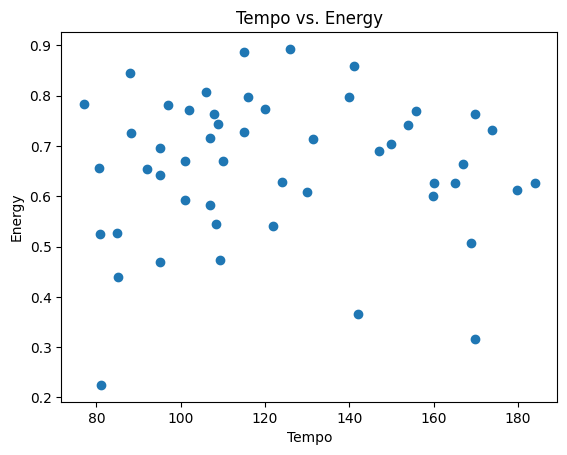

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df['Tempo'], df['Energy'])
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.title('Tempo vs. Energy')
plt.show()
